In [55]:
import re
import numpy as np
import scipy.spatial

def build_matrix(filename):
    lines = open(filename, encoding="utf8").readlines()
    all_words = dict()
    word_ind = dict()
    num_word = 0
    num_doc = 0
    doc_word = np.zeros((100, 500))
    for sentence in lines:
        sentence = sentence.lower()
        words = re.split('[^a-z]', sentence)
        words = list(filter(lambda a: a != '', words))
        for word in words:
            if(word not in all_words):
                all_words.update({word:1})
                word_ind.update({word:num_word})
                doc_word[num_doc,num_word]+=1
                num_word+=1
            else:
                all_words[word]+=1
                doc_word[num_doc,word_ind[word]]+=1
        num_doc+=1
    doc_word = doc_word[:num_doc, :num_word]
    return doc_word

doc_word = build_matrix('sentences.txt')
print(doc_word)
print(doc_word.shape[0], doc_word.shape[1])

dist = np.ones(doc_word.shape[0]-1)
#print(doc_word[0])

for i in range(1, doc_word.shape[0]):
    dist[i-1] = scipy.spatial.distance.cosine(doc_word[0], doc_word[i])

print(dist)
ind = dist.argsort()[:2]
f = open('submission-1.txt', 'w', encoding = 'utf-8')
f.write(' '.join([str(i+1) for i in ind.tolist()]))
f.close()

[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  2. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  1.  1.  1.]]
22 254
[ 0.95275444  0.86447381  0.89517152  0.77708871  0.94023857  0.73273876
  0.92587507  0.88427249  0.90550888  0.83281654  0.88047714  0.83964325
  0.87035926  0.87401184  0.94427218  0.84063619  0.9566445   0.94427218
  0.88854436  0.84275727  0.82503645]


[  1.     1.01   1.02 ...,  14.98  14.99  15.  ]


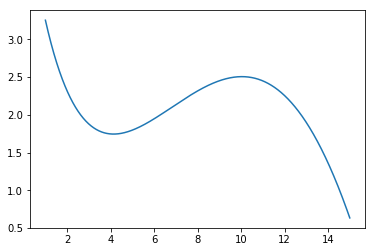

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline
def f(x):
    return np.sin(x/5)*np.exp(x/10)+5*np.exp(-x/2)
x = np.linspace(1, 15, 1401)
print(x)
plt.plot(x,f(x))

[[  1.   1.]
 [  1.  15.]] [ 3.25221687  0.63522142]
[ 3.43914511 -0.18692825]


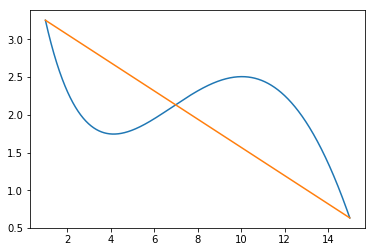

In [32]:
import scipy.linalg
def find_system(x_dots):
    n = x_dots.size
    b = f(x_dots)
    A = np.ones((n,n))
    for i in range(n):
        for j in range(1, n):
            A[i,j] = x_dots[i]**(j)
    return A, b
 
x_dots = np.array([1,15])
A, b = find_system(x_dots)
print(A, b)
w = scipy.linalg.solve(A,b)
print(w)
plt.plot(x,f(x))
plt.plot(x, w[0]+w[1]*x)

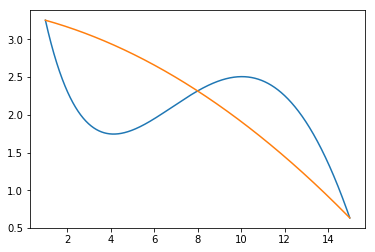

In [33]:
x_dots = np.array([1,8,15])
A, b = find_system(x_dots)
w = scipy.linalg.solve(A,b)
plt.plot(x,f(x))
plt.plot(x, w[0]+w[1]*x+w[2]*x**2)

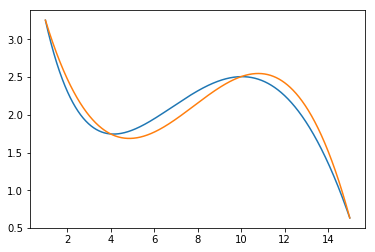

In [34]:
x_dots = np.array([1,4,10,15])
A, b = find_system(x_dots)
w = scipy.linalg.solve(A,b)
plt.plot(x,f(x))
plt.plot(x, w[0]+w[1]*x+w[2]*x**2+w[3]*x**3)

In [41]:
print(w)
f = open('submission-2.txt', 'w', encoding = 'utf-8')
f.write(' '.join([format(lw, ".2f") for lw in w.tolist()]))
f.close()

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]
